## Preprocess--> Asmaa please take starting from this for the pdfs till you find STOP

In [1]:
import nltk
import requests 
from nltk.corpus import stopwords
import pandas as pd
import random
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
!pip install pdfplumber

In [3]:
import pdfplumber

In [4]:
import random
random.seed(0)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('wordnet')
!pip install --upgrade gensim

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Requirement already up-to-date: gensim in /usr/local/lib/python3.7/dist-packages (4.0.1)


**a function that reads the book from gutenberg library and return it's text.**

In [7]:
def read_book(book_name):
    print(book_name)
    if 'txt' not in book_name:
        book_pdf = []
        with pdfplumber.open(book_name) as pdf:
            # x = pdf.pages
            for pdf_page in pdf.pages[14:59]:
                book_pdf.append(pdf_page.extract_text())
            text = '\n'.join(book_pdf)   
    else:
            book_name = book_name + '.txt'
            text = nltk.corpus.gutenberg.raw(book_name)
    return text

In [8]:
def read_from_url(url):
  print(url)
  response = requests.get(url)
  text=response.text.split('***')[2]
  return text

**tokinizing the text into a list of words, turning it to lower case and removing stop words.**<br>
*input : the text of the book<br>
output : a list of filtered words*

In [9]:
#tokinizing the words and removing all punctuation marks then changing it to lower case.
def filter_words(text):
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    tokenized_words = tokenizer.tokenize(text)
    tokenized_words = [token.lower() for token in tokenized_words]
    stop_words=set(stopwords.words("english"))
    stops = ['existentialism', 'albert','camus','stranger', 'cid','153']
    filtered_words=[]
    
    for w in tokenized_words:
        if w not in stop_words and w not in stops:
            filtered_words.append(w)
    return filtered_words

**Stemming and lemmatizing the text**<br>
*Stemming : coverting words like believing, believed, believes, and believe into believ*<br>
*Lemmatizing : coverting words into it's source, like better -> good*

In [10]:
def stem_words(filtered_words):
  ps = PorterStemmer()
  wl=WordNetLemmatizer()
  stemmed=[]
  for w in filtered_words:
    #st=ps.stem(w)
    stemmed.append(wl.lemmatize(w))
  return stemmed


**appending each N words into a partition and labeling them with the book name.**<br>
*input : filtered_words, book_name and number of words*<br>
*output : dataframe of the document as text, tokinized document and label.*

In [11]:
#append each 100 word to a document and label them with the book's name then returns a dataframe
#assumption: i removed the final document to maintain 100 word/document.
def create_docs(filtered_words,book_name,n_words=100):
    labeled_docs=[]
    tokinized_docs=[]
    for i in range(200):
        ###### Would be better if we could make this random choice the same each time #####
        start_token = random.choice(range(len(filtered_words)-100))
        end_token = start_token+100
        tokinized_docs.append(filtered_words[start_token:start_token+100])
        rand_words = filtered_words[start_token:start_token+100]
        rand_partition = ' '.join(rand_words)
        labeled_docs.append(rand_partition)

    labeled_docs= pd.DataFrame({'Document': labeled_docs,'tokinized_doc':tokinized_docs,'label':book_name})
    return labeled_docs


**taking random samples from the labeled documents.**

In [12]:
# take  a random variable
def take_sample(labeled_docs, sample_size):
    samples=labeled_docs.sample(sample_size,random_state=0)
    return samples

**collecting final steps to the function 'sample_book' that takes the book name and sample size and return the final sampled dataframe.**

In [13]:
def sample_book(book_name,sample_size,url,word_per_doc=100):
    if 'txt' not in url:
      path=url 
      text=read_book(path)
    else:
      text=read_from_url(url)
    filtered_words=filter_words(text)
    stemmed_words=stem_words(filtered_words)
    labeled_docs=create_docs(stemmed_words,book_name,word_per_doc)
    samples=take_sample(labeled_docs,sample_size)
    print(book_name)
    return samples


## Preparing model input--> **STOPPP** (just modify ur books)
taking 200 sample from 5 books and appending them into 'samples',<br>
splitiing the data into features and labels, then splitting them into training set and testing set.

In [14]:
books_url=[('nihilism','https://www.gutenberg.org/cache/epub/4363/pg4363.txt'),
            ('nihilism','https://www.gutenberg.org/files/52881/52881-0.txt'),

          #  ('absurdity','/content/drive/MyDrive/CAMUS, Albert - The Stranger.pdf'),
           ('absurdity','/content/drive/MyDrive/plague.pdf'),
            ('exist','/content/drive/MyDrive/Nausea.pdf'),
            ('exist','/content/drive/MyDrive/Existentialism_artificial.pdf'),
           ]
books_count=len(books_url)
samples=pd.DataFrame()

for book in books_url:
  samples=samples.append(sample_book(book[0],200,book[1],150))

samples=samples.reset_index()
samples=samples.drop(columns=['index'])

https://www.gutenberg.org/cache/epub/4363/pg4363.txt
nihilism
https://www.gutenberg.org/files/52881/52881-0.txt
nihilism
/content/drive/MyDrive/plague.pdf
absurdity
/content/drive/MyDrive/Nausea.pdf
exist
/content/drive/MyDrive/Existentialism_artificial.pdf
exist


In [15]:
features= np.array(samples['Document'])
labels=np.array(samples['label'])
print(len(features))

1000


## Word-Embedding --> Don't take this from here

In [192]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

#path = get_tmpfile("word2vec.model")
model = Word2Vec(samples['tokinized_doc'], vector_size=200, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [193]:
vec_doc=[]
for doc in samples['tokinized_doc']:
  vec_doc.append([model.wv[x] for x in doc])

In [194]:
samples['w2v_doc']=vec_doc
samples['flat_w2v']=[ np.hstack(x) for x in vec_doc ]
samples.head(1)
samples['tokinized_doc']
samples['Document']

0      know familiar home many distant dreadful world...
1      weak will almost always symptom lacking thinke...
2      vain man blood remains slave craftiness much s...
3      work organ seems complete reductio ad absurdum...
4      u absolutely completely known without deductio...
                             ...                        
995    demonstrated one self one discovers cogito oth...
996    wholly voluntary nature existence complete fre...
997    found every man mean man particular example un...
998    thrown world responsible everything existentia...
999    would position pronounce general judgment upon...
Name: Document, Length: 1000, dtype: object

In [195]:
#testing the model 
print(f"similarity between different books : {model.wv.n_similarity(samples['tokinized_doc'][0], samples['tokinized_doc'][500])}")

similarity between different books : 0.9999936819076538


In [196]:
model.wv.most_similar('power', topn=10)

[('_â', 0.9999321699142456),
 ('even', 0.9999288320541382),
 ('â', 0.9999275803565979),
 ('perhaps', 0.9999268651008606),
 ('world', 0.999926745891571),
 ('thought', 0.9999212622642517),
 ('life', 0.999920129776001),
 ('thing', 0.9999198317527771),
 ('could', 0.999919593334198),
 ('men', 0.9999191761016846)]

In [197]:
#cosine similarity
def cosine_sim (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]# only get the unique Maker_Model


In [198]:
print('top 5 similar words')
print(cosine_sim (model.wv,'power',samples['tokinized_doc'][1],150)[0:5])
print('least similar words')
print(cosine_sim (model.wv,'power',samples['tokinized_doc'][1],150)[-5:])

top 5 similar words
[('person', 0.99991786), ('fact', 0.9999116), ('give', 0.9999041), ('belief', 0.99990207), ('self', 0.99989885)]
least similar words
[('surprisingly', 0.9266165), ('embellishes', 0.9087062), ('socialistic', 0.8532453), ('souffrance', 0.8102833), ('humaine', 0.73808396)]


In [199]:
from scipy.spatial import distance
def cos_distance(A,B):
  Aflat = np.hstack(A)
  Bflat = np.hstack(B)
  return  distance.cosine(Aflat, Bflat)

In [202]:
print('Same doc')
print(cos_distance(samples['w2v_doc'][5],samples['w2v_doc'][50]))
print('Different docs')
print(cos_distance(samples['w2v_doc'][10],samples['w2v_doc'][800]))

Same doc
0.5283950865268707
Different docs
0.3617110252380371


**Training**

In [203]:
#converting the 2d array in flat_w2v into multiple features
train_df=pd.DataFrame(list(samples['flat_w2v']),columns=[str(x) for x in range(len(samples['flat_w2v'][0]))])
train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,19960,19961,19962,19963,19964,19965,19966,19967,19968,19969,19970,19971,19972,19973,19974,19975,19976,19977,19978,19979,19980,19981,19982,19983,19984,19985,19986,19987,19988,19989,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.272962,0.060031,0.385928,0.021733,0.318390,-0.478538,0.113981,1.206447,-0.388924,0.280583,-0.140155,-0.705768,-0.155572,0.165480,-0.267891,-0.109664,-0.331353,-0.070110,0.050891,-1.037759,0.477670,-0.517928,-0.456671,0.137404,0.001349,-0.080234,0.036858,-0.798291,-0.781866,0.528971,0.556571,0.148354,0.006640,-0.267800,-0.036769,0.393997,0.464837,0.108918,0.100859,-1.013009,...,0.357934,0.160687,-0.248699,-0.016117,0.036190,0.160949,0.352305,-0.316563,-0.005372,0.007543,-0.340661,0.347465,0.103848,-0.158669,0.198644,0.150658,-0.473526,0.347091,0.165603,0.286943,-0.041801,0.008807,0.027287,0.134733,0.234610,0.515755,0.060789,0.247866,0.663265,-0.001143,0.435376,0.017808,0.207857,-0.447713,0.097107,0.444248,0.115779,-0.266025,0.003255,0.026370
1,0.065605,0.011764,0.103319,0.000925,0.084333,-0.118162,0.025049,0.295624,-0.104173,0.070891,-0.036444,-0.175232,-0.045950,0.038969,-0.066512,-0.025932,-0.082151,-0.019570,0.012112,-0.261196,0.120811,-0.128801,-0.110643,0.036165,0.005532,-0.022085,0.004834,-0.201995,-0.197155,0.128913,0.145890,0.037568,-0.001252,-0.065545,-0.005725,0.103168,0.114662,0.031905,0.024016,-0.259123,...,0.493615,0.226442,-0.338878,-0.031679,0.048577,0.213011,0.477776,-0.430801,-0.016434,0.012322,-0.471048,0.470216,0.146644,-0.222168,0.281666,0.217142,-0.652796,0.483441,0.219636,0.388327,-0.060973,0.005684,0.035552,0.183706,0.333975,0.706396,0.075234,0.350869,0.924373,-0.008371,0.599999,0.024518,0.285279,-0.616278,0.142800,0.613125,0.169725,-0.358353,-0.003631,0.033283
2,0.073462,0.021763,0.111418,0.009888,0.086832,-0.126586,0.029936,0.323878,-0.108181,0.075725,-0.040517,-0.187889,-0.046102,0.039657,-0.068426,-0.029565,-0.086020,-0.015253,0.018181,-0.285423,0.126414,-0.139634,-0.123688,0.032954,0.004925,-0.021051,0.008904,-0.212952,-0.219778,0.143542,0.156639,0.044537,-0.002521,-0.073389,-0.014005,0.112458,0.131996,0.034519,0.027401,-0.279246,...,0.015194,0.005671,-0.006172,-0.000618,0.001323,0.004280,0.013555,-0.011014,0.001629,0.004028,-0.011476,0.015093,0.006272,-0.005488,0.003752,0.001135,-0.010355,0.014642,0.007943,0.010943,-0.002393,0.000758,-0.000090,-0.000575,0.008033,0.017621,-0.002606,0.004507,0.021071,0.004680,0.010898,-0.001224,0.006442,-0.011109,-0.000287,0.011929,0.003149,-0.008205,0.004193,-0.001473
3,0.251319,0.051751,0.352069,0.026208,0.290382,-0.425963,0.100522,1.092816,-0.353992,0.262978,-0.134975,-0.630150,-0.141448,0.139516,-0.242453,-0.094875,-0.297382,-0.073217,0.054977,-0.956027,0.421024,-0.480564,-0.418855,0.116602,0.000317,-0.072177,0.025381,-0.725932,-0.715517,0.478052,0.518912,0.143681,-0.003365,-0.230945,-0.038483,0.364649,0.422273,0.108542,0.094626,-0.920000,...,0.536951,0.243040,-0.379230,-0.040176,0.051702,0.241388,0.530642,-0.475515,-0.018174,0.005530,-0.521469,0.512768,0.161160,-0.233477,0.299335,0.237500,-0.703353,0.524035,0.240615,0.421227,-0.053694,0.010856,0.024931,0.202414,0.355640,0.767196,0.089183,0.368738,0.996829,0.004359,0.659096,0.027812,0.295262,-0.672895,0.161100,0.662765,0.182469,-0.396253,-0.009385,0.032107
4,0.313697,0.075568,0.419137,0.010580,0.352987,-0.513155,0.128981,1.281149,-0.403488,0.282753,-0.137906,-0.756661,-0.183935,0.163554,-0.296871,-0.090448,-0.337137,-0.083496,0.066573,-1.110855,0.506461,-0.554604,-0.486287,0.133917,-0.006676,-0.075058,0.031207,-0.839486,-0.821366,0.550939,0.584915,0.158927,-0.000772,-0.283136,-0.041459,0.406248,0.515562,0.133972,0.107837,-1.068645,...,0.104934,0.047562,-0.068852,-0.004380,0.012224,0.044210,0.105613,-0.091590,-0.004621,0.005356,-0.101855,0.097230,0.032530,-0.049482,0.057034,0.046926,-0.136968,0.094900,0.043362,0.085988,-0.006246,0.007658,0.006140,0.036434,0.06570


**TF-IDF and KMEANS** --> Take the following cell only 


In [ ]:
### TF-IDF
x_train = samples['Document']

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer

pipe= Pipeline([
               ('tfidf', TfidfVectorizer()),
               ('clf', KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)),
              ])
pipe.fit(x_train)
###### WE WILL USE THIS y_pred_tf for error analysis and so on
y_pred_tf = pipe.predict(x_train)

The following is the same for choosing k-cluster but changing the train data (had to be first :P)



In [31]:
vec = pipe['tfidf']
x_train_vec = vec.fit_transform(x_train)

In [32]:

wcss = []
for i in range(2, 10,1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_train_vec)
    wcss.append(kmeans.inertia_)


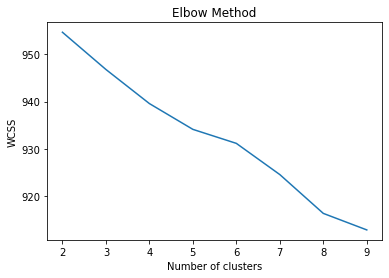

In [34]:
plt.plot(range(2, 10,1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Rubbish drawing forget about it**

In [ ]:
# Features "has no class value" --> reduced_features (pca)
# labels: column of labels of data; y_df['actual']
# lbls: the unique value of your labels: ['nihilism', 'adventure','Animals','history']
# class names: same as lbls; name of our label
def plotData(features, labels, lbls):
    # cls = [0,1,2]
    colors = ['r', 'b','g']
    # markers = ['o', '*']
    
    for class_index in range(len(lbls)): #lbls: [-1, 1] --> [0,1,2]
        # labels == lbls[class_index]
        # print(lbls[class_index])
        x = features['pca1'].loc[labels == lbls[class_index]]
        # print(x)
        y = features['pca2'].loc[labels == lbls[class_index]]
        plt.scatter(x, y, c=colors[class_index],
                    label=lbls[class_index])
        
        Title = "Clusters {n} classes" .format(n=int(len(lbls)))
        plt.title(Title)
        # plt.xlabel('Petal Length (cm)' )
        # plt.ylabel('Petal width (cm)' )
        plt.legend()
        # sns.scatterplot(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, color='black',ax=axes[0])

lbls = ['nihilism', 'absurd','exist']
labels = y_df['y_actual']
# print(labels)
# print(reduced_features)
reduced_features_2 = pd.DataFrame(reduced_features)
reduced_features_2.columns = ['pca1', 'pca2']
reduced_features_2.head()
plotData(reduced_features_2, labels, lbls)
plt.show()

**IMPORTANTT**: Check the frequency of the categories in the clusters
Proposed: Take from here till STOPP

In [35]:

#comparing output
y_df_tf=pd.DataFrame({'y_actual':list(samples['label']),'y_pred':y_pred_tf})
y_df_tf.value_counts()

y_actual   y_pred
nihilism   1         383
exist      0         200
           2         188
absurdity  0         185
nihilism   0          17
absurdity  1          15
exist      1          12
dtype: int64

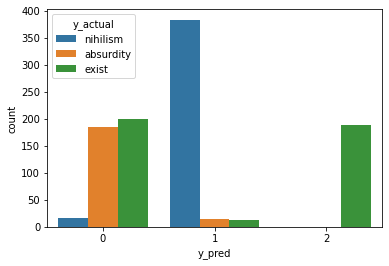

In [37]:
## The plot changes each time; so each time we have to modify the labels; however we can take any and put its reaults
ax = sns.countplot(x="y_pred", hue="y_actual", data=y_df_tf)

Here we can see that cluster_1 --> nihilism, cluster_2 --> existentialism, cluster_0 --> a mix so it might be considered as absurdity

In [39]:
y_df_copy = y_df_tf.copy()
y_df_copy
# df.replace({'A': {0: 100, 4: 400}})
y_df_copy.replace({'y_pred': {0:'absurdity', 2:'exist', 1:'nihilism'}}, inplace = True)
# y_df_copy.replace({'y_actual': {'nihilism':2, 'adventure':0, 'History':1}}, inplace = True)
misclass_df = y_df_copy.loc[y_df_copy['y_pred'] != y_df_copy['y_actual']]
len(misclass_df)
misclass_df  ## Out of 1000 records --> 244 were misclassified

,y_actual,y_pred
15,nihilism,absurdity
59,nihilism,absurdity
61,nihilism,absurdity
120,nihilism,absurdity
146,nihilism,absurdity
...,...,...
898,exist,nihilism
947,exist,nihilism
960,exist,nihilism
982,exist,nihilism


Take from the following any misclassified record

In [52]:
for i in misclass_df.index:
    if i < 200:
      # print(misclass_df.iloc[i])
      print(i, 5*':', samples.iloc[i,0])
      print(misclass_df['y_actual'].iloc[i], '--> Falsely predicted as -->', misclass_df['y_pred'].iloc[i])
      print('\\\\\\\\')
    else:
        break

15 ::::: became ghost haunting glacier bare 7 ye old friend look ye turn pale filled er love fear go yet wrath ye could ne er live farthest realm ice scaur huntsman must one like chamois soar 8 evil huntsman see taut bow bent strongest bolt sent woe arrow peril fraught perilous none yon safe home ye sought 9 ye go thou didst endure enough oh heart strong thy hope unto new friend thy portal widely ope let old one bid memory depart wast thou young better young thou art 10 linked u together one hope tie doth con line fading love
nihilism --> Falsely predicted as --> absurdity
\\\\
59 ::::: huntsman see taut bow bent strongest bolt sent woe arrow peril fraught perilous none yon safe home ye sought 9 ye go thou didst endure enough oh heart strong thy hope unto new friend thy portal widely ope let old one bid memory depart wast thou young better young thou art 10 linked u together one hope tie doth con line fading love wrote thereon like parchment hand shy touch like crackling leaf seared dr

In this  [paper](https://arxiv.org/pdf/2003.01670.pdf) you can see how they used 'svm' as a means for mapping the features and their clusters in order to explain them, since XAI for clustering is still a wide research area that requires more efforts and investigation.

In [ ]:
!pip install lime
!pip install eli5

In [54]:
import eli5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [55]:
x_train = samples['Document']
y_train = y_pred_tf
true_labels = ['absurdity', 'nihilism', 'exist'] # check this from the mapping of confusion matrix too/snsplot

In [56]:
from sklearn.linear_model import LogisticRegressionCV

pipe_LR= Pipeline([('tfidf', TfidfVectorizer()),
                   ('clf', LogisticRegressionCV(max_iter = 300, random_state=0)),
                   ])

pipe_LR.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=None,
                                      dual=False, fit_intercept=True,
    

In [57]:
clf=pipe_LR['clf']
vec=pipe_LR['tfidf']

In [58]:
eli5.show_weights(clf, vec=vec, top=10)

In [59]:
eli5.show_prediction(clf, x_train.iloc[15], vec=vec, target_names=true_labels)

In [60]:
# lime needs vectorizer that has fit and fit_transform
# eli5 wants linear svm and this may not classify our problem correctly; try logistic
from lime import lime_text
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=true_labels)

In [61]:
exp = explainer.explain_instance(x_train.iloc[15], pipe_LR.predict_proba, num_features=6, top_labels=3)

exp.show_in_notebook()

In [82]:
#reducing the dimention to 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
## Toarray --> convert sparse to dense as pca not work with sparse
reduced_features = pca.fit_transform(x_train_vec.toarray())
kmeans_pipe = pipe['clf']
reduced_cluster_centers = pca.transform(kmeans_pipe.cluster_centers_)

3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


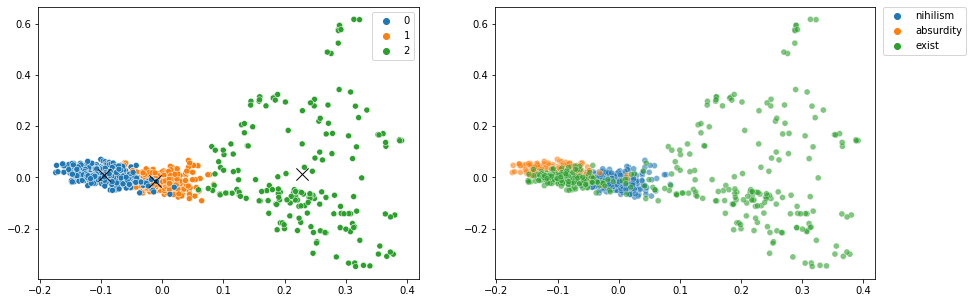

In [83]:
my_palette=sns.color_palette()
n_class=len(reduced_cluster_centers)
print(n_class)
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.scatterplot(reduced_features[:,0], reduced_features[:,1], hue= y_df_tf['y_pred'],palette=my_palette[:3],ax=axes[0])
sns.scatterplot(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, color='black',ax=axes[0])

sns.scatterplot(reduced_features[:,0], reduced_features[:,1], hue = y_df_tf['y_actual'],palette=my_palette[:3],ax=axes[1],alpha=0.6);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

**STOPPPPPPPPPPP**, Thanks for your hardwork <3 <3 

The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

In [62]:
!pip install ExKMC

In [ ]:
from ExKMC.Tree import Tree
k = 3
# Initialize tree with up to 6 leaves, predicting 3 clusters
tree = Tree(k=k, max_leaves=2*k) 

# Construct the tree, and return cluster labels
prediction = tree.fit_predict(train_df)

# Tree plot saved to filename
tree.plot('file')

In [ ]:
# Clone the entire repo.
!git clone -l -s https://github.com/navefr/ExKMC.git cloned-repo

# Change directory into cloned repo
%cd cloned-repo/notebooks

In [33]:
import utils
from utils import plot_confusion_matrix

In [ ]:
# https://github.com/navefr/ExKMC/blob/master/notebooks/Newsgroups%20example.ipynb
labels = ['adventure', 'History', 'nihilism']
class_names = np.array(labels)
plot_confusion_matrix(y_df_copy['y_actual'] , y_df_copy['y_pred'], class_names, normalize=True)

plt.show()

In [ ]:
y_df[y_df['y_pred']==0]['y_actual'].value_counts()


adventure    236
Name: y_actual, dtype: int64

In [ ]:
y_df[y_df['y_pred']==1]['y_actual'].value_counts()

Artistic Anatomy of Animals               186
Commentaries on the Surgery of the War     34
Name: y_actual, dtype: int64

In [ ]:
y_df[y_df['y_pred']==2]['y_actual'].value_counts()

nihilism_Beyond Good and Evil               200
nihilism_The Joyful Wisdom                  200
Legends of Babylon and Egypt in Relation    200
Commentaries on the Surgery of the War      166
adventure_Scaramouche                       105
adventure_The Three Musketeers               49
Artistic Anatomy of Animals                  14
Name: y_actual, dtype: int64

In [ ]:
## calculating silhouette score
silhouette_avg = silhouette_score(train_df, pred_y)
print("For n_clusters =", n_class,
      " \nThe average silhouette_score is :", silhouette_avg)

silhouette_avg = silhouette_score(train_df, pred_y_6)
print("For n_clusters =", 5,
      " \nThe average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
# sample_silhouette_values = silhouette_samples(train_df, pred_y)
# sample_silhouette_values

For n_clusters = 3  
The average silhouette_score is : 0.06664184495475388
For n_clusters = 5  
The average silhouette_score is : -0.016903310440896407


this indicates that 3 clusters case is better than 5 because the -ve sign means that the classes are overlapping and some are wrongly predicted.

## LDA

In [ ]:
from gensim.models import LdaMulticore
from gensim.corpora.dictionary import Dictionary
from gensim import corpora, models

# Create a corpus from a list of texts
dictionary = Dictionary(samples['tokinized_doc'])
#Filter out tokens that appear in less than 15 doc, or more than 50% in all docs and take top 10000 word
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=10000)
#doc to bow
bow_corpus = [dictionary.doc2bow(doc) for doc in samples['tokinized_doc']]
#apply tfidf # didn't change alot
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]


In [ ]:
# Train the model on the bow corpus.
lda_model = LdaMulticore(bow_corpus, num_topics=4, id2word=dictionary, passes=2, workers=2,random_state=0)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.111*"â" + 0.011*"said" + 0.009*"dâ" + 0.007*"artagnan" + 0.006*"de" + 0.006*"would" + 0.006*"man" + 0.005*"andr" + 0.005*"upon" + 0.005*"monsieur"
Topic: 1 
Words: 0.007*"may" + 0.006*"man" + 0.006*"â" + 0.005*"god" + 0.005*"even" + 0.005*"time" + 0.005*"also" + 0.004*"would" + 0.004*"part" + 0.004*"great"
Topic: 2 
Words: 0.012*"muscl" + 0.011*"â" + 0.008*"bone" + 0.007*"form" + 0.007*"part" + 0.007*"surfac" + 0.006*"two" + 0.006*"fig" + 0.006*"extern" + 0.006*"anterior"
Topic: 3 
Words: 0.007*"â" + 0.006*"wound" + 0.006*"may" + 0.005*"part" + 0.005*"man" + 0.005*"surfac" + 0.005*"side" + 0.005*"u" + 0.004*"bone" + 0.004*"form"


In [ ]:
#testing record 1000 
for index, score in sorted(lda_model[bow_corpus[1000]], key=lambda tup: -1*tup[1]):
  print("topic {} \nScore: {}\t \nTopic: {} \n".format(index, score, lda_model.print_topic(index, 6)))

topic 1 
Score: 0.9940868020057678	 
Topic: 0.007*"may" + 0.006*"man" + 0.006*"â" + 0.005*"god" + 0.005*"even" + 0.005*"time" 



In [ ]:
topic=[]
acc=[]
for doc in bow_corpus:
  t=sorted(lda_model[doc], key=lambda tup: -1*tup[1])[0]
  topic.append(t[0])
  acc.append(t[1])

In [ ]:
Lda_df=pd.DataFrame({'y_actual':list(samples['label']),'topic':topic,'accuracy':acc})
Lda_df.head()

,y_actual,topic,accuracy
0,nihilism_Beyond Good and Evil,1,0.993472
1,nihilism_Beyond Good and Evil,1,0.993455
2,nihilism_Beyond Good and Evil,1,0.993502
3,nihilism_Beyond Good and Evil,1,0.992999
4,nihilism_Beyond Good and Evil,1,0.993233


In [ ]:
Lda_df.describe()

,topic,accuracy
count,1400.000000,1400.000000
mean,1.098571,0.921870
std,0.970765,0.131355
min,0.000000,0.387974
25%,0.000000,0.909289
50%,1.000000,0.992994
75%,2.000000,0.993750
max,3.000000,0.994718


In [ ]:
Lda_df[Lda_df['topic']==0]['y_actual'].value_counts()

adventure_The Three Musketeers    200
adventure_Scaramouche             197
nihilism_The Joyful Wisdom         22
nihilism_Beyond Good and Evil       3
Name: y_actual, dtype: int64

In [ ]:
Lda_df[Lda_df['topic']==1]['y_actual'].value_counts()

nihilism_Beyond Good and Evil               197
Legends of Babylon and Egypt in Relation    181
nihilism_The Joyful Wisdom                  177
Commentaries on the Surgery of the War       32
Artistic Anatomy of Animals                   3
adventure_Scaramouche                         3
Name: y_actual, dtype: int64

In [ ]:
Lda_df[Lda_df['topic']==2]['y_actual'].value_counts()

Artistic Anatomy of Animals                 189
Legends of Babylon and Egypt in Relation     17
Commentaries on the Surgery of the War        3
nihilism_The Joyful Wisdom                    1
Name: y_actual, dtype: int64

In [ ]:
Lda_df[Lda_df['topic']==3]['y_actual'].value_counts()

Commentaries on the Surgery of the War      165
Artistic Anatomy of Animals                   8
Legends of Babylon and Egypt in Relation      2
Name: y_actual, dtype: int64

In [ ]:
Lda_df[Lda_df['topic']==4]['y_actual'].value_counts()

Series([], Name: y_actual, dtype: int64)

In [ ]:
pca = PCA(n_components=2,random_state=0)
reduced_features = pca.fit_transform(train_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


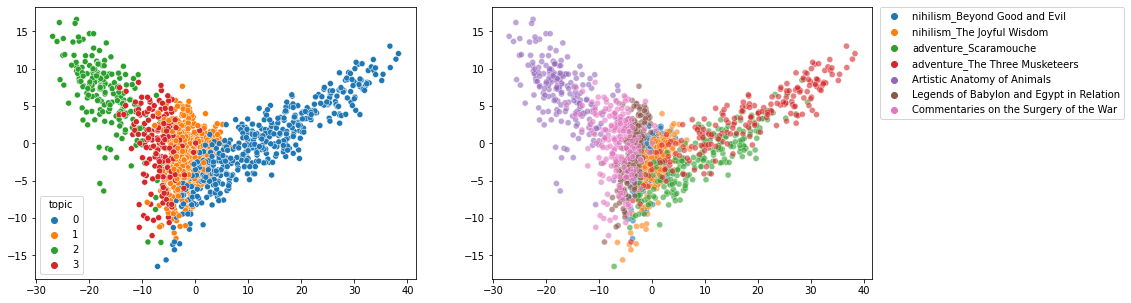

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.scatterplot(reduced_features[:,0], reduced_features[:,1], hue=  Lda_df['topic'],palette=my_palette[:4],ax=axes[0])

sns.scatterplot(reduced_features[:,0], reduced_features[:,1], hue = y_df['y_actual'],palette=my_palette[:books_count],ax=axes[1],alpha=0.6);
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [ ]:
## calculating silhouette score
silhouette_avg = silhouette_score(train_df, Lda_df['topic'])
print("The average silhouette_score for LDA model is :", silhouette_avg)

The average silhouette_score for LDA model is : -0.0341490188462831


In [ ]:
##homogeneity_score
from sklearn.metrics.cluster import homogeneity_score
homogeneity_score([0, 0, 1, 1], [0, 1, 1, 1])

0.31127812445913283